Los datos que se analizarán en este archivo serán las imágenes tomadas en la clase 14/05 del espectro de emisión del Argón, Helio, Hidrógeno, Krypton y Neón.

Primero se ajustará el espectro del Helio para realizar la calibración.

In [111]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sp_sig
from scipy import stats
import numpy as np
import math

In [2]:
def archivo_excel (nombre_del_archivo):
    datos = pd.read_excel  (nombre_del_archivo, index_col = None)
    pixeles_aux = pd.DataFrame (datos, columns = ["X"])
    escala_grises_aux = pd.DataFrame (datos, columns = ["Y"])

    pixeles = []
    escala_grises = []
    for i in range (len (pixeles_aux)):
        pixeles.append (pixeles_aux["X"][i])
        escala_grises.append (int(escala_grises_aux["Y"][i]))
    return [pixeles,escala_grises]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


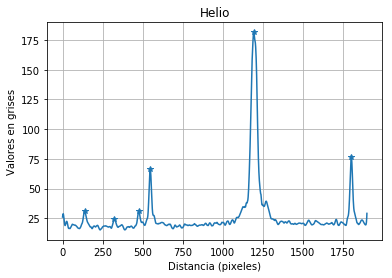

In [112]:
## -------------- ** -------------- ##
helio = '1.Intensidad_Vs_Pixeles_Helio.xlsx'
pixeles, escala_grises = archivo_excel (helio)
# Con esto suavizo la señal. El primer número indica el ancho de la ventana (ni idea que es) y el segundo el orden del
# polinomio con el cual ajusta la señal, o algo asi.
escala_grises_fil = sp_sig.savgol_filter (escala_grises,65,9).tolist()

## -------------- ** -------------- ##
# Encuentro la posición en la lista escala_... de los maximos, tomando como criterio que esten por encima del valor 24 y que
# sean en una distancia de 50 pixeles el único valor tomado como máximo.
aux = sp_sig.find_peaks (escala_grises_fil, height = 24, distance = 50)
ind_maximos = aux[0].tolist()
# Viendo el gráfico selecciono los elementos de la lista ind_... que no son máximos reales sino que se deben al ruido en la
# señal.
elementos_remover = [4,1137,1270,1707]
for l in (elementos_remover):
    ind_maximos.remove (l)

## -------------- ** -------------- ##
# Una vez que ya tengo la lista con las posiciones de los máximos que representan las verdades lineas espectrales, i.e. las que
# se observan en la imagen, marco con una estrella en el grafico dichos maximos para estar seguro que son ellos.
pix_max = []
esc_gris_max = []
for j in (ind_maximos):
    j = int(j)
    pix_max.append (pixeles[j])
    esc_gris_max.append (escala_grises_fil[j])
plt.plot (pixeles, escala_grises_fil, markevery = pix_max, marker = "*")

## -------------- ** -------------- ##
# ESTO NO LO USE.

# Calculo del error en las longitudes de onda. Voy a calcular el ancho de la campana principal. Este seria el error mas grande.
# escala_grises_fil_int = [] #Esta lista contiene todas las partes enteras de la lista escala_grises_fil.
# for i in escala_grises_fil:
#     escala_grises_fil_int.append (int(i))
# aux1 = escala_grises_fil_int.index(int(escala_grises_fil[ind_maximos[4]]/2))
# error_campana_principal = (ind_maximos[4] - aux1) #En pixeles.
# print (error_campana_principal)

## -------------- ** -------------- ##
plt.xlabel ("Distancia (pixeles)")
plt.ylabel ("Valores en grises")
plt.title ("Helio")
plt.grid ()
plt.show ()

# Este script que viene no lo uso

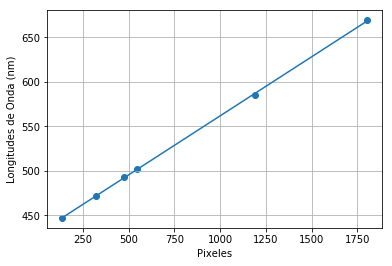

492.1436878095684 493


In [35]:
# ESTE SCRIPT NO LO USO PARA EL AJUSTE LINEAL. UTILIZO EL QUE SIGUE QUE ME DA LA MATRIZ DE COVARIANZA.

# Ahora que ya tengo los puntos que son maximos realizo un ajuste lineal.
# X ---> posición en pixeles. Y ---> Longitud de onda.
x = pix_max
# Estas longitudes de onda son de los datos obtenidos con el espectrometro. 
y = [447,472,493,502,585,669]
pendiente, ordenada, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter (x,y)
a = pendiente
b = ordenada
f_lineal = lambda x: a*x+b

rango = np.linspace (min (x),max (x),1000)
plt.plot (rango,f_lineal(rango))

## -------------- ** -------------- ##
plt.xlabel ("Pixeles")
plt.ylabel ("Longitudes de Onda (nm)")
plt.grid ()
plt.show ()

## -------------- ** -------------- ##
print (f_lineal(x[2]),y[2])

## Otra forma de hacer el ajuste lineal.
##### Uso esta porque me da la matriz de covarianza.

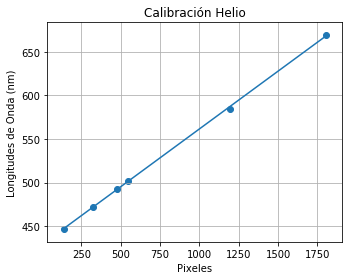

In [114]:
x = pix_max
y = [447,472,493,502,585,669]
POC = np.polyfit (x,y,1,cov=True) # Pendiente de la recta, ordenada al origen y matriz de covarianza.
var_pendiente = POC[1][0][0]
var_ordenada = POC [1][1][1]

## -------------- ** -------------- ##
a = POC[0][0]
b = POC[0][1]
f_lineal = lambda x: a*x+b

rango = np.linspace (min (x),max (x),1000)

## -------------- ** -------------- ##
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot (rango,f_lineal(rango))
ax.scatter (x,y)
ax.set_title ("Calibración Helio")
ax.set_xlabel ("Pixeles")
ax.set_ylabel ("Longitudes de Onda (nm)")

## ------------------ ** ------------------ ##
fig.tight_layout()

plt.grid ()
fig.savefig('Calibración Helio.png', bbox_inches="tight")
plt.show ()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


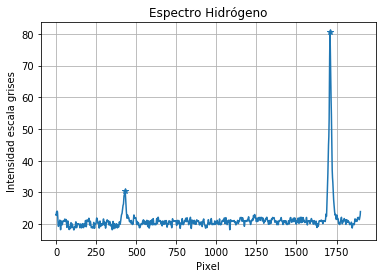

λ1 =  486.179 ± 1.381 nm
λ2 =  655.585 ± 2.602 nm


In [104]:
## -------------- ** -------------- ##
hidrogeno = '1.Intensidad_Vs_Pixeles_Hidrogeno.xlsx'
pixeles, escala_grises = archivo_excel (hidrogeno)
escala_grises_fil = sp_sig.savgol_filter (escala_grises,21,9)

## -------------- ** -------------- ##
aux = sp_sig.find_peaks (escala_grises_fil, height=27, distance = 50)
ind_maximos = aux[0].tolist()

## -------------- ** -------------- ##
pix_max = []
esc_gris_max = []
for j in (ind_maximos):
    j = int(j)
    pix_max.append (pixeles[j])
    esc_gris_max.append (escala_grises_fil[j])
plt.plot (pixeles, escala_grises_fil, markevery = pix_max, marker = "*")
## -------------- ** -------------- ##
pix_max = np.asarray(pix_max)
long_onda = f_lineal (pix_max)
# Hay una mejor predicción del rojo (6700) que del azul (4900). En la imagen se observa que el rojo se ve mas nitido que el azul.

## -------------- ** -------------- ##
# Errores en la predicción de las longitudes de onda.
sigma_long_onda = []
for i in range (len(long_onda)):
    varianza = var_ordenada + pix_max[i]**2 * var_pendiente
    sigma_long_onda.append (math.sqrt(varianza))

# print (sigma_long_onda)

plt.title ("Espectro Hidrógeno")
plt.xlabel ("Pixel")
plt.ylabel ("Intensidad escala grises")

plt.grid ()
plt.show ()

print ("λ1 = ",round(long_onda[0],3),u"\u00B1",round(sigma_long_onda[0],3),"nm")
print ("λ2 = ",round(long_onda[1],3),u"\u00B1",round(sigma_long_onda[1],3),"nm")

In [110]:
# Calculo constante de Rydberg.
# https://en.wikipedia.org/wiki/Rydberg_formula
# https://en.wikipedia.org/wiki/Balmer_series

f_x = lambda n1,n2: 1/(n1**2) - 1/(n2**2) # Calcula la componente x. factor que multiplica a la constante de rydberg.
x = [f_x (4,2),f_x(3,2)]
y = [1/long_onda[0],1/long_onda[1]]
pendiente, ordenada, r_value, p_value, std_err = stats.linregress(x,y)
R = -1*pendiente

# Rteo = 1.09677583×107 m−1

## -------------- ** -------------- ##
# Calculo del error de la constante R.

varianza_R = 0
for i in range (len(x)):
    varianza_R = varianza_R + (1/x[i])**2 * y[i]**4 * sigma_long_onda[i]**2
sigma_R = math.sqrt (varianza_R)

print ("Rexp = ",round(R,5),u"\u00B1",round(sigma_R,5),"nm-1")
print ("Rteo = ",0.01096,"nm-1")

Rexp =  0.01093 ± 5e-05 nm-1
Rteo =  0.01096 nm-1


### Preguntas.
Krypton: ¿Se puede deber eso a que la lámpara no tenga mas potencia?

Neon: ¿Cómo separamos mas las líneas?

Analisis de datos: 
- ¿Se puede poner barras de error al ajuste lineal, o uno solamente tiene que poner el error en los datos y ver si estos tocan o no al ajuste?
- ¿Cómo determinamos el error de los datos? Cual es el criterio para determinar el error en la medición de las líneas espectrales del Helio? Podemos decir que es el ancho de la campana en cada máximo? Porque en ese rango de pixeles tenemos el mismo valor de Longitud de Onda.